# Prosper Loan Data Exploration
Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States.

Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors.

Prosper Marketplace is backed by leading investors including Sequoia Capital, Francisco Partners, Institutional Venture Partners, and Credit Suisse NEXT Fund. https://www.prosper.com/about

This dataset spans about 113,000 Prosper loans originated from 2005 to 2014. It will be explored to gain insights and/or trends into how this peer-to-peer lending platform works

## DATA WRANGLING: ASSESSING

In [1]:
#importing neccessary tools required for Assesing and exploration
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
prosper = pd.read_csv("C:/Users/HP/Downloads/prosperLoanData.csv")
pd.set_option('display.max_columns', None)
prosper.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
81067,1E043528882028749905D1A,532545,2011-10-14 16:59:58.580000000,NaN,36,Completed,2014-02-11 00:00:00,0.16056,0.1390,0.1290,0.1285,0.0380,0.0905,6.0,A,9.0,1,NY,Professional,Employed,23.0,False,False,NaN,2011-10-14 16:59:57,740.0,759.0,1997-11-01 00:00:00,6.0,4.0,11.0,3,83.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,6745.0,0.27,17523.0,11.0,1.00,1.0,0.21,"$50,000-74,999",True,4416.666667,7E2A3632098785735BA71F3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,29,54703,6000,2011-10-20 00:00:00,Q4 2011,26703520248320971D39283,204.77,7287.40,6000.00,1287.40,-92.62,0.0,0.00,0.00,0.0,1.0,0,0,0.0,76
90604,B896351353037378558CF42,503070,2011-04-20 07:50:49.103000000,NaN,36,Completed,2012-06-28 00:00:00,0.35643,0.3199,0.3099,0.2917,0.1830,0.1087,1.0,HR,4.0,7,CA,Engineer - Mechanical,Full-time,125.0,False,False,NaN,2011-04-20 07:50:35,660.0,679.0,1993-01-01 00:00:00,23.0,16.0,51.0,15,362.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,21633.0,0.72,7802.0,50.0,1.00,2.0,0.27,"$100,000+",True,9166.666667,311A3617946750013A6573A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,35,48924,4000,2011-04-28 00:00:00,Q2 2011,3E2C3486687549050A86D3F,174.20,4388.85,4000.00,388.85,-12.16,0.0,0.00,0.00,0.0,1.0,0,0,0.0,51
111894,2B0A35823925187604EA29D,825608,2013-07-01 18:38:05.170000000,NaN,60,Current,NaN,0.22693,0.2024,0.1924,0.1800,0.0699,0.1101,4.0,C,6.0,1,NJ,Other,Employed,9.0,False,False,NaN,2013-07-01 18:37:56,680.0,699.0,1993-05-01 00:00:00,11.0,9.0,62.0,8,342.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46003.0,0.95,1717.0,48.0,1.00,0.0,0.38,"$50,000-74,999",True,5166.666667,B6CC3686090043002787A31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,8,94452,15000,2013-07-05 00:00:00,Q3 2013,0C053582214270783236966,399.41,2795.87,1060.50,1735.37,-85.73,0.0,0.00,0.00,0.0,1.0,0,0,0.0,188
111439,84753539871544275359C44,560933,2012-02-21 00:49:21.083000000,NaN,36,Completed,2012-08-10 00:00:00,0.35797,0.3177,0.3077,0.2896,0.1650,0.1246,1.0,HR,5.0,15,TX,Other,Employed,29.0,True,False,NaN,2012-02-21 00:49:15,680.0,699.0,1998-03-24 00:00:00,11.0,9.0,32.0,7,231.0,2.0,11.0,1.0,0.0,0.0,1.0,0.0,7098.0,0.56,4771.0,30.0,0.90,1.0,0.22,"$25,000-49,999",True,3916.666667,0B4E3643325184477696E07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,25,60963,4000,2012-02-23 00:00:00,Q1 2012,C22835393693448557ACC08,173.71,4563.90,4000.00,563.90,-17.75,0.0,0.00,0.00,0.0,1.0,0,0,0.0,5
37975,122D3536614046411D4D13A,553356,2012-01-22 11:38:00.067000000,NaN,60,Chargedoff,2013-12-09 00:00:00,

In [3]:
prosper.shape

(113937, 81)

In [4]:
print(prosper.ListingCreationDate.max())
print(prosper.ListingCreationDate.min())
print(prosper.LoanOriginationDate.max())
print(prosper.LoanOriginationDate.min())

2014-03-10 12:20:53.760000000
2005-11-09 20:44:28.847000000
2014-03-12 00:00:00
2005-11-15 00:00:00


In [5]:
prosper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
prosper.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [7]:
prosper.duplicated().sum()

0

In [8]:
#to see only columns that have missing values
prosper[prosper.columns[prosper.isna().any()]]

,CreditGrade,ClosedDate,BorrowerAPR,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,GroupKey,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanFirstDefaultedCycleNumber
0,C,2009-08-14 00:00:00,0.16516,NaN,NaN,NaN,NaN,NaN,NaN,CO,Other,Self-employed,2.0,NaN,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0.12016,0.07960,0.0249,0.05470,6.0,A,7.0,CO,Professional,Employed,44.0,NaN,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,HR,2009-12-17 00:00:00,0.28269,NaN,NaN,NaN,NaN,NaN,NaN,GA,Other,Not available,NaN,783C3371218786870A73D20,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0.12528,0.08490,0.0249,0.06000,6.0,A,9.0,GA,Skilled Labor,Employed,113.0,NaN,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,0.24614,0.18316,0.0925,0.09066,3.0,D,4.0,MN,Executive,Employed,44.0,NaN,680.0,699.0,2004-02-20 00:00:00,19.0,19.0,49.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,1.0,11.0,11.0,0.0,0.0,11000.0,9947.90,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,NaN,NaN,0.22354,0.16490,0.0699,0.09500,4.0,C,5.0,IL,Food Service Management,Employed,246.0,NaN,700.0,719.0,1997-09-01 00:00:00,9.0,9.0,41.0,0.0,0.0,0.0,0.0,7.0,1.0,0.0,7714.0,0.80,1886.0,37.0,0.83,3.0,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113933,NaN,NaN,0.13220,0.10070,0.0200,0.08070,6.0,A,8.0,PA,Professional,Employed,21.0,NaN,700.0,719.0,1992-01-17 00:00:00,14.0,13.0,39.0,1.0,4.0,1.0,5062.0,4.0,0.0,0.0,15743.0,0.69,6658.0,39.0,0.92,0.0,0.11,3.0,60.0,60.0,0.0,0.0,33501.0,4815.42,-26.0,NaN
113934,NaN,NaN,0.23984,0.18828,0.1025,0.08578,3.0,D,3.0,TX,Other,Employed,84.0,NaN,700.0,719.0,2002-02-25 00:00:00,12.0,12.0,25.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,22147.0,0.73,7853.0,25.0,1.00,0.0,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113935,NaN,2013-08-13 00:00:00,0.28408,0.24450,0.0850,0.15950,4.0,C,5.0,GA,Food Service,Full-time,94.0,NaN,680.0,699.0,1993-12-01 00:00:00,11.0,11.0,22.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,11956.0,0.69,4137.0,19.0,0.80,1.0,0.48,1.0,16.0,16.0,0.0,0.0,5000.0,3264.37,-4.0,NaN


In [9]:
def missing(prosper):
    ''' function to find the percentage of missing/null values in each column of the prosper dataset '''
    print (round((prosper.isnull().sum() * 100/ len(prosper)),2).sort_values(ascending=False).head(50))
           
missing(prosper)

GroupKey                               88.29
LoanFirstDefaultedCycleNumber          85.12
ScorexChangeAtTimeOfListing            83.39
ProsperPrincipalOutstanding            80.62
ProsperPrincipalBorrowed               80.62
ProsperPaymentsOneMonthPlusLate        80.62
ProsperPaymentsLessThanOneMonthLate    80.62
OnTimeProsperPayments                  80.62
TotalProsperLoans                      80.62
TotalProsperPaymentsBilled             80.62
CreditGrade                            74.59
ClosedDate                             51.65
ProsperRating (Alpha)                  25.53
ProsperScore                           25.53
EstimatedReturn                        25.53
ProsperRating (numeric)                25.53
EstimatedLoss                          25.53
EstimatedEffectiveYield                25.53
DebtToIncomeRatio                       7.51
EmploymentStatusDuration                6.69
AmountDelinquent                        6.69
CurrentCreditLines                      6.67
BankcardUt

### QUALITY AND TIDINESS ISSUES
1. Missing values
2. Wrong datatypes for variables e.g., categorical and time variables listed as object

A lot of data is missing from the first 10 columns as seen in the missing(prosper) function above, about a whooping 80%! why is that? lets consult the Prosper Loans Data-Variables Definition sheet. According to this sheet:

1. LoanFirstDefaultedCycleNumber: The cycle the loan was charged off. If the loan has not charged off the value will be null. 
2. ScorexChangeAtTimeOfListing: Borrower's credit score change at the time the credit profile was pulled. This will be the change relative to the borrower's last Prosper loan. This value will be null if the borrower had no prior loans.
3. ProsperPrincipalOutstanding Principal outstanding on Prosper loans at the time the listing was created. This value will be   null if the borrower had no prior loans.

And so it goes down to TotalProsperPaymentsBilled. What does this mean? It means that these missing values should not exist because the borrower had no prior loans and are missing for logical reasons.

About 74% of the values in the CreditGrade column is missing! why is that? This is because this Credit Grade rating is only applicable for listings pre-July-2009 period and will only be populated for those listings. It implies that this rating method is no longer in use after July 2009. Therefore, these missing values are valid.

ClosedDate column has about 50% of its values missing. The missing values indicate that the loan is still running, i.e., current so cannot have a closed date thus, its missing values are valid and logical.

ProsperRatingAlpha down to EstimatedEffectiveYield all have about 25% of values missing because the columns are only applicable for loans originated after July 2009 thus, its missing values are valid and logical.

DebtToIncomeRatio down to other columns with missing values have below 10% of their values missing because at the time the loan listings were created or credit pulled (hard inquiry), these information were not available. 


### DATA WRANGLING: CLEANING

In [10]:
# convert grades, ratings and scores to  ordered categorical types
print(prosper['CreditGrade'].unique())
print(prosper['ProsperRating (Alpha)'].unique())
print(prosper['ProsperRating (numeric)'].unique())
print(prosper['ProsperScore'].unique())

['C' nan 'HR' 'AA' 'D' 'B' 'E' 'A' 'NC']
[nan 'A' 'D' 'B' 'E' 'C' 'AA' 'HR']
[nan  6.  3.  5.  2.  4.  7.  1.]
[nan  7.  9.  4. 10.  2. 11.  8.  5.  3.  6.  1.]


In [11]:
ordinal_var_dict = {'CreditGrade': ['AA','A','B','C','D','E','HR','NC'],
                    'ProsperRating (Alpha)': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'N/A'],
                    'ProsperRating (numeric)': ['7', '6', '5', '4', '3', '2', '1', '0'],
                    'ProsperScore':['1','2','3','4','5','6','7','8','9','10','11']
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    prosper[var] = prosper[var].astype(ordered_var)

In [12]:
#converting other categorical variables into categories. These are not ordinal so no need to order them.
prosper[['ListingCategory (numeric)','EmploymentStatus','LoanStatus','Term']].astype('category')

,ListingCategory (numeric),EmploymentStatus,LoanStatus,Term
0,0,Self-employed,Completed,36
1,2,Employed,Current,36
2,0,Not available,Completed,36
3,16,Employed,Current,36
4,2,Employed,Current,36
...,...,...,...,...
113932,1,Employed,Current,36
113933,7,Employed,FinalPaymentInProgress,36
113934,1,Employed,Current,60
113935,2,Full-time,Completed,60


Since the null or zero values in this dataset are valid. I will replace all zero values with nan for consistency in the dataset

In [13]:
prosper = prosper.replace(0, np.nan)

### EXPLORATION AND DATA ANALYSIS
As can be seen from above, prosper credit rating and some other factors changed by July 2009. As I explore this dataset, I will have to create subsets of the dataframe to properly explore what happened during those periods for insights into the lending platform.

### RESEARCH QUESTIONS
1. What category of loan is most popular amongst borrowers in prosper loans and why?
2. What influence or affect interest rates on borrower's loans?
3. How does the rating system work at Prosper loans?
4. What category of loan is most popular amongst lenders and why?

In [14]:
#changing the listing creation dates to the proper date type.
import datetime as dt
prosper.ListingCreationDate = pd.to_datetime(prosper.ListingCreationDate)
prosper["month"] = prosper["ListingCreationDate"].dt.month
prosper["year"] = prosper["ListingCreationDate"].dt.year

Lets explore this dataset a little..

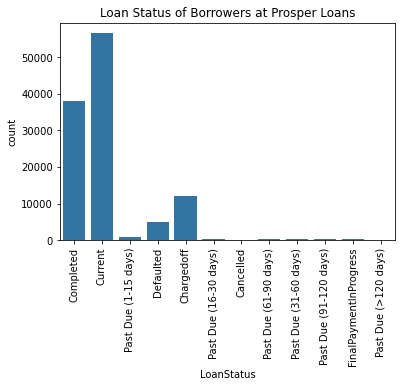

In [15]:
sb.countplot(data=prosper, x='LoanStatus', color=sb.color_palette()[0])
plt.title('Loan Status of Borrowers at Prosper Loans')
plt.xticks(rotation=90);

Many loan payments have been completed and a lot still ongoing. There are some chargedoff loans and less defaulted loans and even less past due loans

In [16]:
#I want to know the fixed term rates of loans at prosper
prosper_loanterm_count = prosper.Term.value_counts()

(-1.1051549867118768,
 1.1046243395023896,
 -1.1052190188111344,
 1.104560307403132)

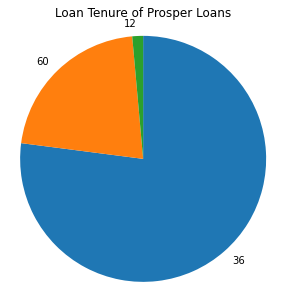

In [17]:
plt.figure(figsize=[20,5])
plt.pie(prosper_loanterm_count, labels=prosper_loanterm_count.index, startangle=90, counterclock=False);
plt.title('Loan Tenure of Prosper Loans')
plt.axis('square')

Most borrowers prefer medium to long term loans than short term. 36 months appears to be the most preferred term from the pie chart above.

(-1.1043171598761963,
 1.1017675785290497,
 -1.1029798206055392,
 1.1031049177997068)

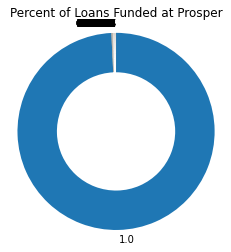

In [18]:
prosper_percentfunded_count = prosper.PercentFunded.value_counts()
plt.pie(prosper_percentfunded_count, labels=prosper_percentfunded_count.index, startangle=90, counterclock=False,
        wedgeprops={'width':0.4});
plt.title('Percent of Loans Funded at Prosper')
plt.axis('square')

Most loans at prosper were fully funded, that means most borrowers got their desired loan amount.

Q1. Which category of loan is most popular amongst borrowers and why?

lets start by looking at the distribution of the loan category and some variables in these sub-datasets

Text(0.5, 1.0, 'Listing Category of Loans at Prosper Loans')

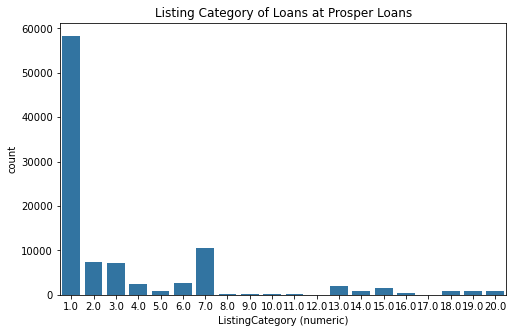

In [19]:
plt.figure(figsize=[8,5])
sb.countplot(data = prosper, x = 'ListingCategory (numeric)', color = sb.color_palette()[0]);
plt.title('Listing Category of Loans at Prosper Loans')

Loan categories 1, 2, 3 and 7 are popular and categories 4, 5, 6, 13, 14, 15,18,19 and 20 are quite popular amongst borrowers. Loan category 1 though is clearly the most popular. Lets explore further to know why...I will start by looking at the interest rates and fees of these loan categories.

Text(0.5, 1.0, 'Interest and Fees Charges on Loan Categories at Prosper')

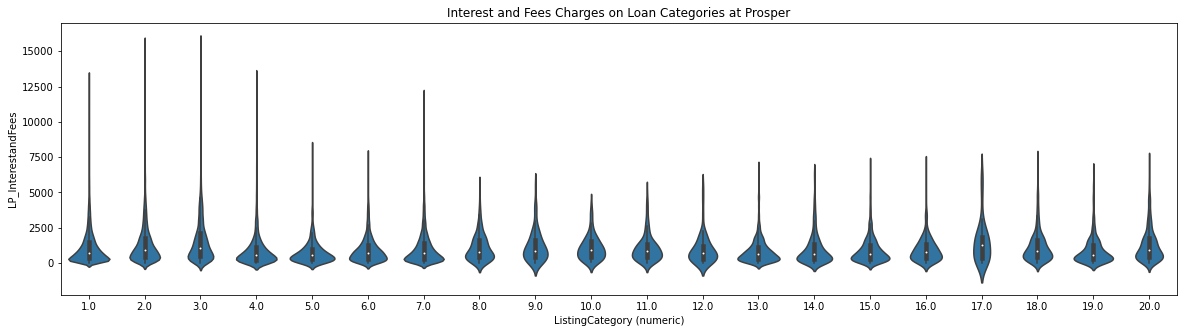

In [20]:
plt.figure(figsize=[20,5])
ax1=sb.violinplot(data=prosper, x='ListingCategory (numeric)', y='LP_InterestandFees', color=sb.color_palette()[0]);
plt.title('Interest and Fees Charges on Loan Categories at Prosper')

We see that the overall shape and distribution of the interests and fees are similar for all loan categories (quartiles very close to each other) below $2500, but there are more outliers in the case of loan categories 1,2,3,4 and 7, which are the popular loan categories. Lets look at the actual interest rates of these loan categories. Perhaps I will get more insight there..

Text(0.5, 1.0, 'Interest Rates on Loan Categories at Prosper')

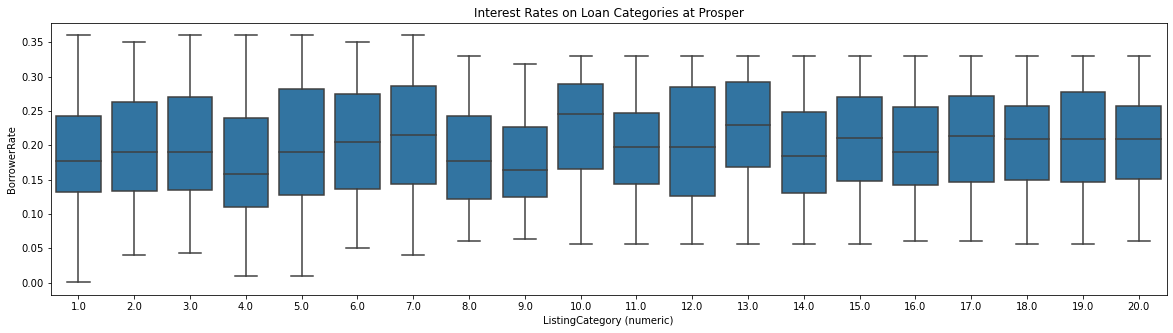

In [21]:
plt.figure(figsize=[20,5])
base_color = sb.color_palette()[0]
sb.boxplot(data=prosper, x='ListingCategory (numeric)', y='BorrowerRate', color=base_color);
plt.title('Interest Rates on Loan Categories at Prosper')

The box plot shows the interest rates of loans grouped together by categories. From this plot, there is an increase in interest rate from about 15% for loan category 4 to about 25% for loan category 10. Although all loan categories have interest rates between 5% and 35% on average, Loan category 1 appears to have the least minimum interest rate of below 5% compared to other loan categories. This is important to note..

Interest rates on loan categories appear to be the same on average. It is not very clear if category 1 has more advantage over other categories at this point. Lets look at this visually to gain more insight. We will continue this investigation while trying to answer question 2 of our research question.

Q2.What influences or affects the interest rate(s) of loans borrowed at prosper loans?

(0.0, 0.4)

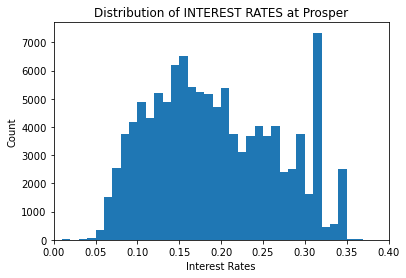

In [22]:
#lets look at the distribution of interest rates of these loans. We will consider the whole dataset here.
bins = np.arange(0, prosper['BorrowerRate'].max()+0.01, 0.01)
plt.hist(data=prosper, x='BorrowerRate', bins=bins);
plt.title('Distribution of INTEREST RATES at Prosper')
plt.xlabel('Interest Rates')
plt.ylabel('Count')
plt.xlim(0,0.4)

Distribution has a long tail and is roughly bimodal with noticeable peaks at 0.15 and 0.32. Now lets look at factors that might influence these rates. I will start with the loan tenure...

Text(0.5, 1.0, 'Distribution of Interest Rates Per Loan Loan Term at Prosper')

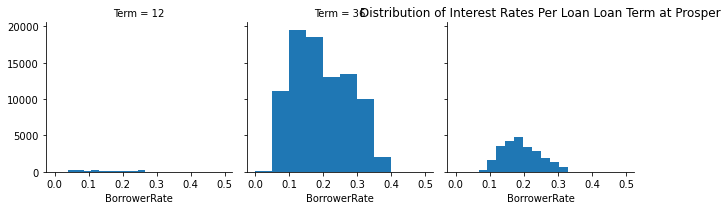

In [23]:
#lets 
g=sb.FacetGrid(data=prosper, col='Term')
g.map(plt.hist, 'BorrowerRate')
plt.title('Distribution of Interest Rates Per Loan Loan Term at Prosper')

Borrowers with 12 months appears to have the least range of interest rates from about 5% to 25%, while that of 36 months have the highest between 0% to almost 40%. Next I will look at the loan amounts...

Text(0, 0.5, 'Count')

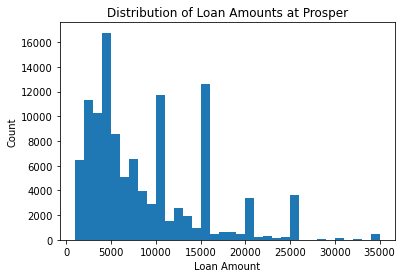

In [24]:
#lets look at the distribution of loan amounts
bins = np.arange(1000, prosper['LoanOriginalAmount'].max()+1000, 1000)
plt.hist(data=prosper, x='LoanOriginalAmount', bins=bins);
plt.title('Distribution of Loan Amounts at Prosper')
plt.xlabel('Loan Amount')
plt.ylabel('Count')

Loan amount distribution is right skewed with a long tail. I will perform a log transformation to have a better insight into the distribution.

In [25]:
np.log10(prosper['LoanOriginalAmount'].describe())

count    5.056665
mean     3.921011
std      3.795588
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

Text(0, 0.5, 'Count')

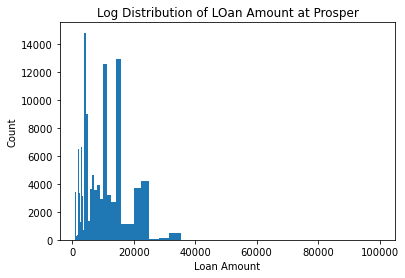

In [26]:
bins=10**np.arange(3, 5+0.05, 0.05)
plt.hist(data=prosper, x='LoanOriginalAmount',bins=bins);
plt.title('Log Distribution of LOan Amount at Prosper')
plt.xlabel('Loan Amount')
plt.ylabel('Count')

Prosper loan amounts range from $1,000 to about $35,000. Now does this influence interest rate?

Text(0, 0.5, 'BorrowerRate')

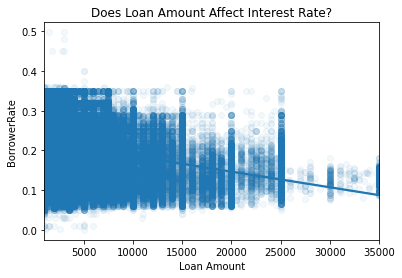

In [27]:
#plotting a scatterplot of interest rate and loan amount
sb.regplot(data=prosper, x='LoanOriginalAmount', y='BorrowerRate', scatter_kws={'alpha':1/20});
plt.title('Does Loan Amount Affect Interest Rate?')
plt.xlabel('Loan Amount')
plt.ylabel('BorrowerRate')

Hmm there seems to be a negative relationship between loan amount and interest rate here! The higher the loan amount, the lower the interest rate though, there seems to be little difference between the interest rates of loan amounts between $25,000 and $35,000.

Now, Who are these borrowers? Are they employed? what is their monthly income? do these factors influence the interest rate of loans? lets look at the borrowers' employment statuses.

In [28]:
#lets find the proportion of borrowers employment status
employment_status_count = prosper['EmploymentStatus'].value_counts()
total_employment_count = prosper['EmploymentStatus'].value_counts().sum()
max_employment_count = employment_status_count[0]
max_employment_prop = max_employment_count/total_employment_count
print(max_employment_prop)

0.6028008094410917


In [29]:
tick_props = np.arange(0, max_employment_prop, 0.06)
tick_props

array([0.  , 0.06, 0.12, 0.18, 0.24, 0.3 , 0.36, 0.42, 0.48, 0.54, 0.6 ])

Text(0.5, 0, 'Employment Status Proportion')

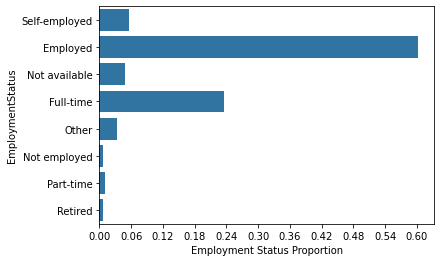

In [30]:
tick_names =['{:0.2f}'.format(v) for v in tick_props]
tick_names
sb.countplot(data=prosper, y='EmploymentStatus',color=base_color)
plt.xticks(tick_props*total_employment_count,tick_names)
plt.xlabel('Employment Status Proportion')

From the above bar plot, more than 50% of borrowers at prosper loans are either partly, fully or self employed. Very few of these borrowers are retired or not employed. With very few borrowers employment status unavailable. Does this affect interest rate of loans? lets see...

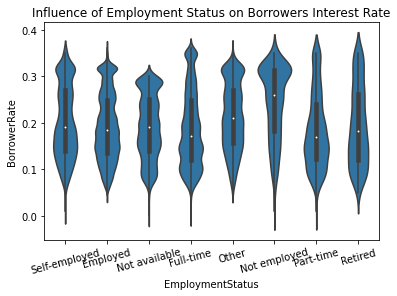

In [31]:
sb.violinplot(data=prosper, x='EmploymentStatus', y='BorrowerRate', color=base_color)
plt.title('Influence of Employment Status on Borrowers Interest Rate')
plt.xticks(rotation=15);

Ok, The median interest rate of unemployed borrowers appears to be higher compared to others. Most of their interest rate is distributed above 30%. On the other hand, distribution of those who are fully or partly employed have lower rates centered below 20%...lets look at their employment duration

Text(0, 0.5, 'BorrowerRate')

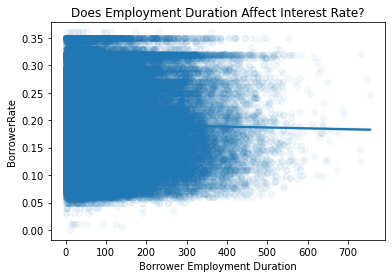

In [32]:
#lets look at the employment status duration and see if it influences the interest rate
sb.regplot(data=prosper, x='EmploymentStatusDuration', y='BorrowerRate', x_jitter=0.3, scatter_kws={'alpha':1/20});
plt.title('Does Employment Duration Affect Interest Rate?')
plt.xlabel('Borrower Employment Duration')
plt.ylabel('BorrowerRate')

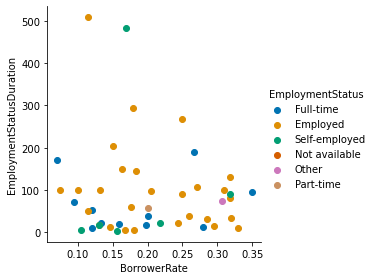

In [33]:
#lets plot a sample of about 50,000 so we dont overcrowd the plot
sample=np.random.choice(prosper.shape[0], 50,000)
prosper_subset = prosper.loc[sample]
g=sb.FacetGrid(data=prosper_subset, hue='EmploymentStatus', height=4, palette='colorblind')
g.map(plt.scatter, 'BorrowerRate','EmploymentStatusDuration')
g.add_legend()

Employment duration do not influence interest rate of loans. This can be seen from the scatter plot above, besides the straight line scatterplot, the facet grid scatter plot shows that although some borrowers with longer employment duration enjoyed minimal interest rates, the same is applicable for some with shorter employment duration. 

Next, I will look at the monthly income of these borrowers

In [34]:
prosper.StatedMonthlyIncome.describe()

count    1.125430e+05
mean     5.677489e+03
std      7.498419e+03
min      8.333300e-02
25%      3.293333e+03
50%      4.703000e+03
75%      6.833333e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [35]:
np.log10(prosper['StatedMonthlyIncome'].describe())

count    5.051318
mean     3.754156
std      3.874970
min     -1.079183
25%      3.517636
50%      3.672375
75%      3.834633
max      6.243039
Name: StatedMonthlyIncome, dtype: float64

Text(0, 0.5, 'Count')

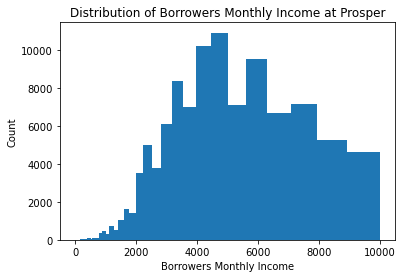

In [36]:
bins=10**np.arange(-1, 4+0.05, 0.05)
plt.hist(data=prosper, x='StatedMonthlyIncome', bins=bins);
plt.title('Distribution of Borrowers Monthly Income at Prosper')
plt.xlabel('Borrowers Monthly Income')
plt.ylabel('Count')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Effect of Borrowers Monthly Income on Interest Rates')

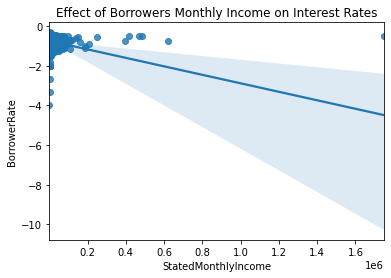

In [37]:
# sb.regplot(data=prosper, x='StatedMonthlyIncome', y='BorrowerRate', scatter_kws={'alpha':1/20});
# plt.title('Does Borrower Monthly Income Affect Interest Rate?')
# plt.xlabel('Borrower Monthly Income')
# plt.ylabel('BorrowerRate')

def log_trans(x,inverse=False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10,x)
sb.regplot(prosper['StatedMonthlyIncome'], prosper['BorrowerRate'].apply(log_trans));
plt.title('Effect of Borrowers Monthly Income on Interest Rates')

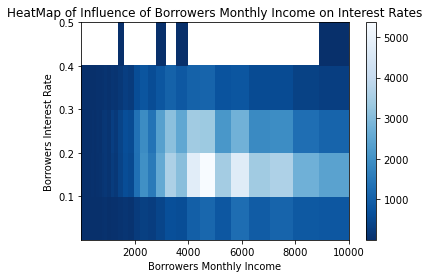

In [38]:
bin_x = 10**np.arange(-1, 4+0.05, 0.05)
bin_y = np.arange(prosper['BorrowerRate'].min(), prosper['BorrowerRate'].max()+0.1, 0.1)
plt.hist2d(data=prosper, x='StatedMonthlyIncome', y='BorrowerRate', cmin=0.5, cmap='Blues_r', bins=[bin_x,bin_y])
plt.colorbar()
plt.title('HeatMap of Influence of Borrowers Monthly Income on Interest Rates')
plt.xlabel('Borrowers Monthly Income')
plt.ylabel('Borrowers Interest Rate');

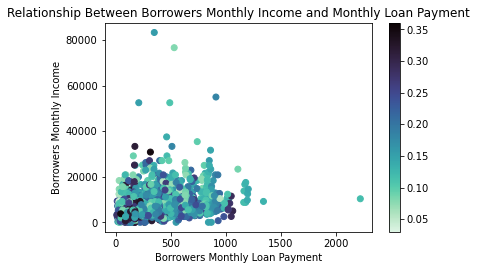

In [39]:
sample=np.random.choice(prosper.shape[0], 5000, replace=False)
prosper_subset = prosper.loc[sample]
plt.scatter(data=prosper_subset, x='MonthlyLoanPayment', y='StatedMonthlyIncome', c='BorrowerRate', cmap='mako_r')
plt.xlabel('Borrowers Monthly Loan Payment')
plt.ylabel('Borrowers Monthly Income')
plt.title('Relationship Between Borrowers Monthly Income and Monthly Loan Payment')
plt.colorbar()
plt.subplots_adjust(top=0.85)

The heatmap above indicates that borrowers with monthly income above $2,000 have lower interest rates compared to borrowers of monthly income below $2,000. But looking at this multivariate plot, there is no clear distinction between the interest rates of borrowers monthly income, monthly loan payment and the interest charged on these loans. I will move on to explore if any, the relationship between interest rate and credit score.

I will start by looking at the distribution of credit scores within this dataset.

Q3. How does the rating system work?

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


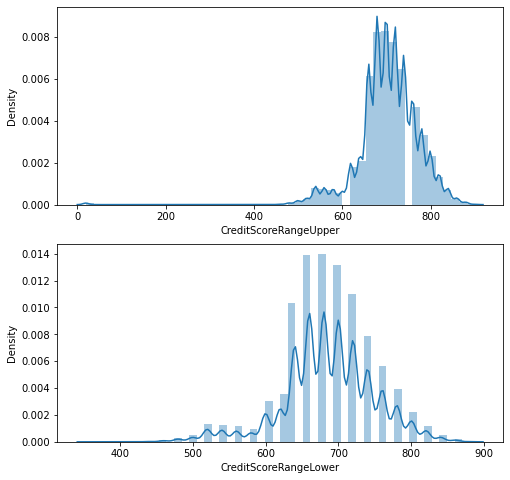

In [40]:
fig, ax = plt.subplots(nrows=2, figsize = [8,8])

sb.distplot(prosper['CreditScoreRangeUpper'], ax=ax[0])
sb.distplot(prosper['CreditScoreRangeLower'], ax=ax[1])

plt.show()

In [41]:
prosper.CreditScoreRangeUpper.value_counts(dropna=False)

699.0    16492
679.0    16366
719.0    15471
739.0    12923
659.0    12199
759.0     9267
779.0     6606
799.0     4624
639.0     4172
619.0     3602
819.0     2644
539.0     1593
559.0     1474
839.0     1409
579.0     1357
599.0     1125
NaN        591
859.0      567
519.0      554
499.0      346
879.0      212
479.0      141
19.0       133
459.0       36
899.0       27
439.0        5
379.0        1
Name: CreditScoreRangeUpper, dtype: int64

In [42]:
credit_score_19 = prosper.loc[prosper['CreditScoreRangeUpper']==19]
credit_score_19

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,month,year
794,00EF338150577356881AD6B,97950,2007-02-11 13:40:55.490,NC,36,Completed,2010-02-22 00:00:00,0.29776,0.2900,0.2850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Not available,NaN,False,False,NaN,2007-02-11 12:46:31.633000000,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not displayed,True,115.583333,9C783382679752780A231FD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.0,7697,4000,2007-02-22 00:00:00,Q1 2007,60493379289275032D64C21,167.62,6028.14,4000.00,2028.14,-34.97,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,38,2,2007
912,7A41337257909407897EB67,61512,2006-11-14 08:23:08.430,NC,36,Defaulted,2007-11-18 00:00:00,0.27276,0.2600,0.2450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IL,Clerical,Not available,NaN,False,True,FE113364863511529673D04,2006-11-10 06:15:36.980000000,NaN,19.0,2001-03-21 00:00:00,NaN,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.03000,Not displayed,True,2316.666667,219A3374837043585EE9D11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,158.0,12.0,88.0,4746,1500,2006-11-20 00:00:00,Q4 2006,3204337306322107592F3A8,60.44,414.88,209.79,205.09,-4.10,NaN,1290.20,1290.21,NaN,1.0,NaN,NaN,NaN,11,11,2006
1685,403F33816853903261A0142,94290,2007-02-06 15:50:46.723,NC,36,Chargedoff,2008-04-20 00:00:00,0.18065,0.1625,0.1575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Not available,NaN,False,False,NaN,2007-02-06 08:28:22.457000000,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not displayed,True,1600.000000,49213381523869980CEE7ED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2271.0,14.0,85.0,7691,1000,2007-02-21 00:00:00,Q1 2007,CF073373650048977B01CCC,35.28,297.84,153.81,144.03,-1.11,-19.1100,846.17,846.19,NaN,1.0,NaN,NaN,NaN,64,2,2007
4290,4B4C33658186085093BB6B4,7055,2006-04-23 14:19:41.030,NC,36,Chargedoff,2007-12-25 00:00:00,0.24502,0.2375,0.2325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,F4E13366162858013BE1046,2006-04-23 14:08:38.650000000,NaN,19.0,2000-08-21 00:00:00,NaN,NaN,6.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10368,Not displayed,True,2916.666667,227C336582331295560AE98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2388.0,20.0,95.0,618,4000,2006-04-26 00:00:00,Q2 2006,38A033656115101140C13B0,156.41,2341.15,1328.65,1012.50,-21.31,NaN,2671.35,2671.35,NaN,1.0,NaN,NaN,NaN,24,4,2006
4371,985433663733409747DA533,31236,2006-08-14 11:45:59.710,NC,36,Defaulted,2007-09-26 00:0

In [43]:
credit_score_nan = prosper.loc[prosper['CreditScoreRangeUpper'].isnull()]
credit_score_nan

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,month,year
206,2EB933650172111114C843E,3509,2006-03-25 13:09:11.680,D,36,Defaulted,2007-06-29 00:00:00,0.27767,0.2700,0.2575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,F555336594467179889CEFB,2006-03-10 02:29:21.710000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.16573,Not displayed,True,9166.666667,2B7133643961670445961C3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,177.0,15.0,96.0,323,7500,2006-03-29 00:00:00,Q1 2006,110A336465998424756030B,306.19,3007.76,1477.51,1530.25,-22.78,NaN,6022.51,6022.49,NaN,1.0,NaN,NaN,NaN,57,3,2006
387,09A833656549997602264C7,1105,2006-03-02 17:49:16.430,B,36,Completed,2006-10-04 00:00:00,0.09337,0.0865,0.0815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,ACD93365117236917D1BFD4,2006-03-02 17:49:16.430000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.12624,Not displayed,True,3000.000000,64BE3366206912038FCE2D4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,174,3500,2006-03-13 00:00:00,Q1 2006,69D933646754525905A852D,110.73,3658.03,3500.00,158.03,-9.13,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,51,3,2006
698,00BA3364778959938EDA750,137,2006-02-07 12:01:25.260,AA,36,Completed,2006-04-26 00:00:00,0.07680,0.0700,0.0650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,NaN,2006-02-07 12:01:25.260000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02727,Not displayed,True,8333.333333,9E6A336489187946159821D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,36,6001,2006-02-09 00:00:00,Q1 2006,8DE133657363264326FD856,185.29,6086.46,6001.00,85.46,-6.10,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,10,2,2006
1023,357433648518369759061C7,4343,2006-03-30 11:08:08.503,AA,36,Completed,2006-05-16 00:00:00,0.08684,0.0800,0.0750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,93CF3366288090645BD9EE1,2006-03-30 08:39:01.850000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02480,Not displayed,True,8333.333333,05BD3364958143665263770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,396,5000,2006-04-05 00:00:00,Q2 2006,6D11336601070734709170C,156.68,5032.63,5000.00,32.63,-2.03,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,51,3,2006
1126,43D03365506791463BE5D2A,1908,2006-03-13 10:45:16.130,C,36,Completed,2006-04-03 00:00:00,0.20735,0.2000,0.1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,83

Some credit score values are zero and some 19. This is because the credit profile of these borrowers at the time their credit profile was pulled was either "Not Complete" or 0. There is barely any record of their CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization	and AvailableBankcardCredit utilization thus, credit scores couldnt be properly calculated or they are first time borrowers

This explains the reason behind the left skewness of the credit score histograms.

Since these borrowers were able to secure loans from prosper, I will not drop them.

The credit score has two columns; upper and lower range. Looking at these columns' values, the difference is not much. I will first replace the null values with zero, then sum upper and lower credit scores together and find their overall mean. Those are the values I will work with.

In [44]:
prosper['CreditScoreRangeUpper'].replace(np.nan, 0, inplace=True)
prosper['CreditScoreRangeLower'].replace(np.nan, 0, inplace=True)

In [45]:
#creating a column with the average of the credit upper and lower ranges
prosper['credit_score'] = (prosper['CreditScoreRangeUpper']+prosper['CreditScoreRangeLower'])/2
prosper['credit_score'] = prosper['credit_score'].astype('int')
prosper.credit_score.sample(2)

37919    709
43095    629
Name: credit_score, dtype: int32

Text(0, 0.5, 'BorrowerRate')

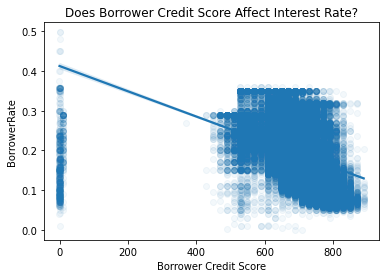

In [46]:
sb.regplot(data=prosper, x='credit_score', y='BorrowerRate', x_jitter=0.3, scatter_kws={'alpha':1/20});
plt.title('Does Borrower Credit Score Affect Interest Rate?')
plt.xlabel('Borrower Credit Score')
plt.ylabel('BorrowerRate')

The credit scores mainly fall between 450 and 850. It is interesting to note that the higher the credit score, the lower the interest rate. 

What are the grades or ratings of these credit scores? How are they determined? Do they only influence interest rates or do they affect the outcome of the loan status? lets look at the distribution of credit grades and ratings within these sub-datasets.

CreditGrades are applicable prior to July, 2009 and prosper alpha ratings applicable from July 2009. I will be using the different subsets created earlier to analyse this...

(-44.45, 933.45)

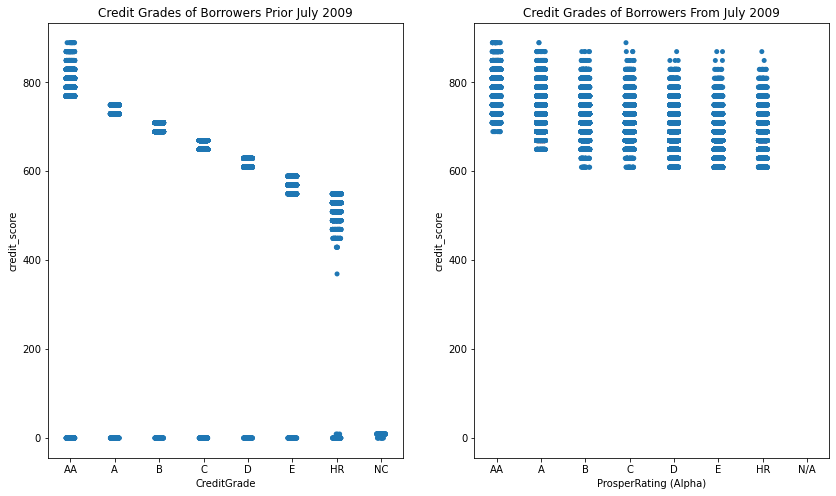

In [47]:
#creating dataframes before and after July 2009
before_july_2009 = prosper[(prosper["month"]<7)|(prosper["year"]<=2009)]
after_july_2009 = prosper[(prosper['month']>=7)|(prosper['year']>=2009)]
fig, ax = plt.subplots(figsize=(14,8))

base_color = sb.color_palette()[0]
plt.subplot(1,2,1)
ax1=sb.stripplot(data=before_july_2009, x='CreditGrade', y='credit_score', color=base_color);
plt.title('Credit Grades of Borrowers Prior July 2009')

plt.subplot(1,2,2)
sb.stripplot(data=after_july_2009, x='ProsperRating (Alpha)', y='credit_score', color=base_color);
plt.title('Credit Grades of Borrowers From July 2009')

plt.ylim(ax1.get_ylim())


Credit scores prior July 2009 fell between 0 (those without credit scores) and about 850 with AA having the highest credit scores followed by A, B, C, D, E and HR. AA grades appears to have credit scores majorly above 700, A between 640-780, B between 630-700, C between  620-650, D between 580-640, E between 570-600, HR between 400-560...this is not very clear. Its just an approximation!.

While from July 2009, there is considerably improvement on the credit scores of borrowers at prosper loans. Credit scores are between 600 and about 850. Hmmm...lets look at the prosper score

Text(0.5, 1.0, 'Ratings Compared to Loan Status of Borrowers Prior July 2009')

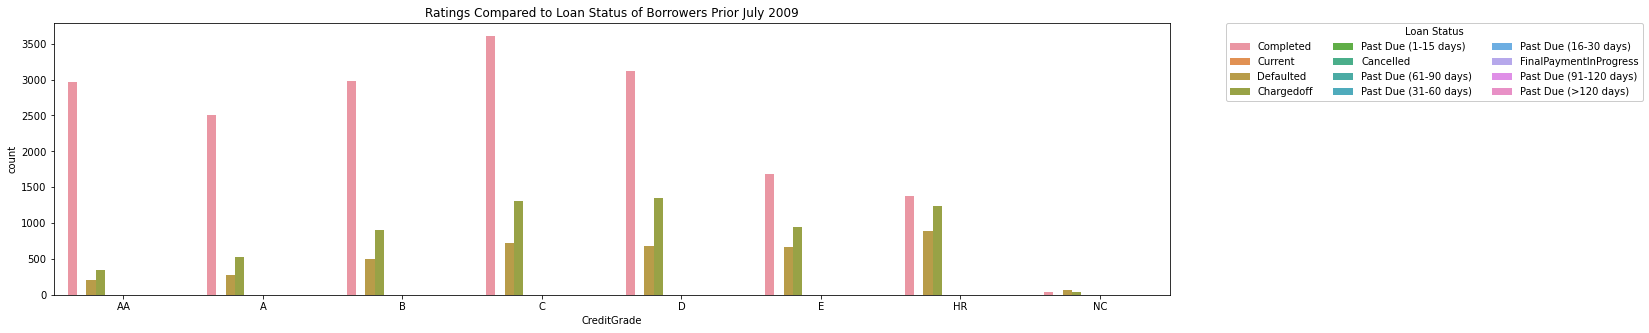

In [48]:
plt.figure(figsize=[20,5])
sb.countplot(data=before_july_2009, x='CreditGrade', hue='LoanStatus');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, ncol=3, framealpha=1, title='Loan Status')
plt.title('Ratings Compared to Loan Status of Borrowers Prior July 2009')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Ratings Compared to Loan Status of Borrowers From July 2009')

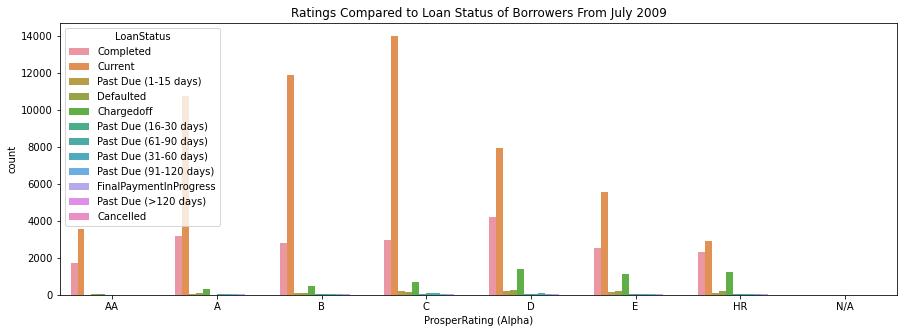

In [49]:
plt.figure(figsize=[15,5])
sb.countplot(data=after_july_2009, x='ProsperRating (Alpha)', hue='LoanStatus');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3, framealpha=1, title='Loan Status')
plt.title('Ratings Compared to Loan Status of Borrowers From July 2009')

Regardless of rating grade, many borrowers were able to complete their loan payments though charged off and defaulted loans mainly occur with borrowers with average ratings such as C, D, E and HR.

Text(0.5, 1.0, 'Credit Grades of Borrowers From July 2009')

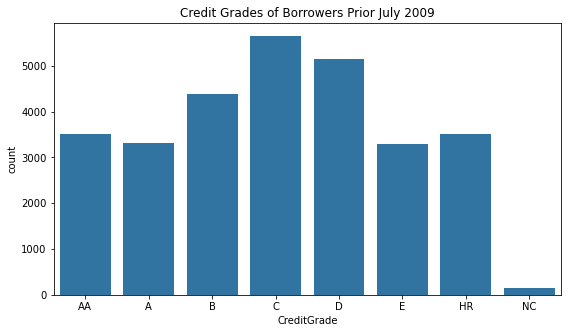

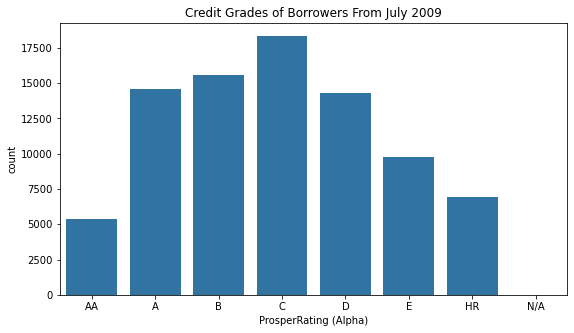

In [50]:
plt.figure(figsize=[20,5])
base_color = sb.color_palette()[0]

plt.subplot(1,2,1)
ax1=sb.countplot(data = before_july_2009, x = 'CreditGrade', color = base_color)
plt.title('Credit Grades of Borrowers Prior July 2009')

plt.figure(figsize=[20,5])
plt.subplot(1,2,2)
sb.countplot(data = after_july_2009, x = 'ProsperRating (Alpha)', color = base_color)
plt.title('Credit Grades of Borrowers From July 2009')

Looks like even after the upgrade at Prosper loans, most of their borrowers appears to have average ratings with majority being C-rated.

In [51]:
#lets see the proportion of most borrowers' ratings at prosper loans 
#before July 2009
credit_grade_count = prosper['CreditGrade'].value_counts()
credit_order = credit_grade_count.index
total_creditgrade_count = prosper['CreditGrade'].value_counts().sum()
max_creditgrade_count = credit_grade_count[0]
max_prop_creditgrade = max_creditgrade_count/total_creditgrade_count
print(max_prop_creditgrade)

#after july 2009
rating_grade_count = prosper['ProsperRating (Alpha)'].value_counts()
rating_order = rating_grade_count.index
total_rating_count = prosper['ProsperRating (Alpha)'].value_counts().sum()
max_rating_count = rating_grade_count[0]
max_prop_rating = max_rating_count/total_rating_count
print(max_prop_rating)


0.19510931509688115
0.21619742377994886


In [52]:
#tick props for creditgrade before july 2009
tick_props_before = np.arange(0, max_prop_creditgrade, 0.01)
print(tick_props_before)

#tick props for alpha ratings afterjuly 2009
tick_props_after = np.arange(0, max_prop_rating, 0.01)
print(tick_props_after)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19]
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21]


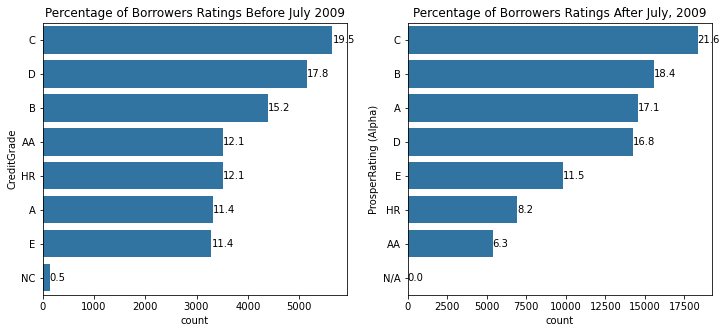

In [53]:
plt.figure(figsize=[12, 5])
plt.subplot(1,2,1)
sb.countplot(data=before_july_2009, y='CreditGrade', color=base_color, order=credit_order);
plt.title('Percentage of Borrowers Ratings Before July 2009')
for i in range(credit_grade_count.shape[0]):
    count=credit_grade_count[i]
    pct_string = '{:0.1f}'.format(100*count/total_creditgrade_count)
    plt.text(count+1, i, pct_string, va='center')
    

    
plt.subplot(1,2,2)
sb.countplot(data=after_july_2009, y='ProsperRating (Alpha)', color=base_color, order=rating_order);
plt.title('Percentage of Borrowers Ratings After July, 2009')
for i in range(rating_grade_count.shape[0]):
    count=rating_grade_count[i]
    pct_string = '{:0.1f}'.format(100*count/total_rating_count)
    plt.text(count+1, i, pct_string, va='center')

While there is a visible increase in high credit score borrowers after July, 2009 (credit scores of borrowers have improved), majority of Prosper loans borrowers have average credit scores with C rating being the most popular. I will explore this further...

(7.5, -0.5)

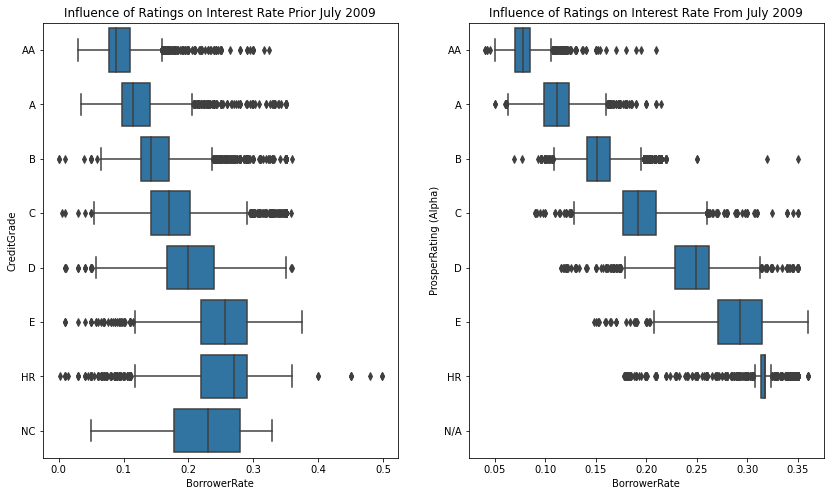

In [54]:
# fig, ax = plt.subplots(nrows=2, figsize = [8,8])
# fig.tight_layout(h_pad=6)
# fig.suptitle('How Does Borrowers Credit Grade Influence Loan Interest Rate Before July 2009')
# plt.subplots_adjust(top=0.85)
# g.fig.set_size_inches(14, 8);

# base_color = sb.color_palette()[0]

# sb.boxplot(data=before_july_2009, y='CreditGrade', x='BorrowerRate', color=base_color, ax = ax[0]);
# #g.fig.set_size_inches(14, 8);

# sb.boxplot(data=after_july_2009, y='ProsperRating (Alpha)', x='BorrowerRate', color=base_color, ax = ax[1]);
# plt.title('How Does Borrowers Credit Grade Ratings Influence Loan Interest Rate After July, 2009')

# plt.show()

fig, ax = plt.subplots(figsize=(14,8))

base_color = sb.color_palette()[0]
plt.subplot(1,2,1)
ax1=sb.boxplot(data=before_july_2009, x='BorrowerRate', y='CreditGrade', color=base_color);
plt.title('Influence of Ratings on Interest Rate Prior July 2009')

plt.subplot(1,2,2)
sb.boxplot(data=after_july_2009, y='ProsperRating (Alpha)', x='BorrowerRate', color=base_color);
plt.title('Influence of Ratings on Interest Rate From July 2009')

plt.ylim(ax1.get_ylim())

Generally, although interest rates are lower for borrowers with good credit scores on average, it appears that after July 2009, interest rates for borrowers with good credit scores were further reduced. For example, borrowers with AA ratings were charged interest between 0.05% and below 20% but after July 2009, these borrowers were charged between 0.05% and below 12%. 

All grades have outliers at both the minimum and maximum ends (except borrowers with "NC" credit scores prior July, 2009). However, the whiskers for grades AA, A and B are more compact than other grades, which implies that borrowers with these grades have more consistent performance than borrowers with other grades. Furthermore, the interest rate for borrowers with 'NC' grades are evenly distributed with median interest rates of about 22%. 

Prior July 2009, some borrowers with average or low ratings outperformed those with high ratings with interest rates below their minimum threshold, the same is seen after July 2009. In the same vein, some borrowers with high ratings performed poorly during these periods with interest rates above their maximum. 

Unexpectedly, looking at the two periods, the whiskers for borrowers with high grades are on par or almost the same with that of borrowers with average or lower ratings, that is, many of them had high interest rates on their loans regardless of credit score or rating. 

why the disparity? lets look at their loan status. loans due past a certain time period is too low to be considered.

In [55]:
#first lets create a dataframe of these loan status
under_scrutiny_status = prosper[(prosper['LoanStatus']=='Defaulted')|(prosper['LoanStatus']=='Chargedoff')|
                               (prosper['LoanStatus']=='Completed')]
                    
under_scrutiny_status.sample(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,month,year,credit_score
51229,A6573416733601499501B6C,300621,2008-03-27 21:29:45.480,A,36,Completed,2009-06-15 00:00:00,0.11616,0.1022,0.0922,NaN,NaN,NaN,NaN,NaN,NaN,4.0,CO,Analyst,Full-time,21.0,False,False,NaN,2008-03-27 21:24:12.870000000,720.0,739.0,2001-02-28 00:00:00,6.0,6.0,16.0,5.0,60.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8800.0,10.0,1.0,2.0,0.17,"$75,000-99,999",True,6423.166667,20933418330943700EFA4E2,1.0,4.0,4.0,NaN,NaN,15000.0,NaN,-40.0,NaN,NaN,71.0,29329,8000,2008-04-07 00:00:00,Q2 2008,8EC73383852828502F1E977,258.96,8813.04,8000.0,813.04,-79.55,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,356,3,2008,729
16687,37B83426494235079813ABF,369147,2008-07-17 14:18:36.210,HR,36,Completed,2010-02-08 00:00:00,0.37453,0.3500,0.3400,NaN,NaN,NaN,NaN,NaN,NaN,1.0,IN,Skilled Labor,Full-time,2.0,False,False,NaN,2008-07-01 20:23:25.797000000,540.0,559.0,1999-05-12 00:00:00,4.0,4.0,10.0,3.0,44.0,1.0,5.0,NaN,NaN,NaN,1.0,NaN,1201.0,0.98,33.0,5.0,0.4,1.0,0.24,"$1-24,999",True,2000.000000,F92A34268797495642C412E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,34583,2000,2008-07-25 00:00:00,Q3 2008,DD4E3425720870394469548,90.47,2901.85,2000.0,901.85,-25.77,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,34,7,2008,549


In [56]:
#looking at the ratings distribution of these borrowers prior July 2009
status_count = under_scrutiny_status.groupby(['CreditGrade', 'LoanStatus']).size()
#reseting index to convert above series into dataframe
status_count = status_count.reset_index(name='count')
#using pivot table to rearrange and have credit grade on rows
status_count = status_count.pivot(index='CreditGrade', columns='LoanStatus', values='count')
status_count

LoanStatus,Chargedoff,Completed,Defaulted
CreditGrade,,,
AA,339,2969,201
A,526,2505,283
B,909,2987,493
C,1310,3609,729
D,1343,3126,684
E,946,1678,665
HR,1242,1372,891
NC,35,42,64


Text(0.5, 1.0, 'Performance of Borrowers on Loan Payments Based on Rating Prior 2009')

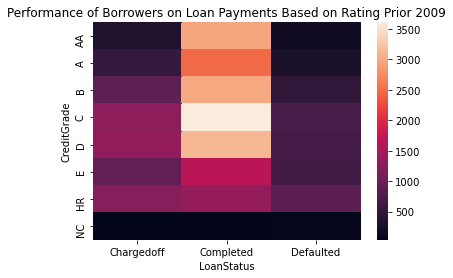

In [57]:
#Plotting a heatmap to visualize this
sb.heatmap(status_count);
plt.title('Performance of Borrowers on Loan Payments Based on Rating Prior 2009')

In [58]:
#looking at the ratings distribution of these borrowers after July 2009
status_count_new = under_scrutiny_status.groupby(['ProsperRating (Alpha)', 'LoanStatus']).size()
#reseting index to convert above series into dataframe
status_count_new = status_count_new.reset_index(name='count')
#using pivot table to rearrange and have credit grade on rows
status_count_new = status_count_new.pivot(index='ProsperRating (Alpha)', columns='LoanStatus', values='count')
status_count_new

LoanStatus,Chargedoff,Completed,Defaulted
ProsperRating (Alpha),,,
AA,63,1700,20
A,326,3203,79
B,500,2785,88
C,706,2977,134
D,1395,4192,282
E,1131,2506,193
HR,1215,2301,209
N/A,0,0,0


Text(0.5, 1.0, 'Performance of Borrowers on Loan Payments Based on Rating After 2009')

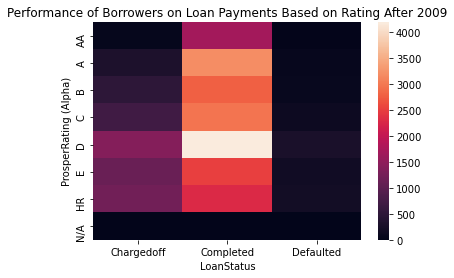

In [59]:
#Plotting a heatmap to visualize this
sb.heatmap(status_count_new);
plt.title('Performance of Borrowers on Loan Payments Based on Rating After 2009')

Prior July 2009, borrowers regardless of rating performed poorly but after July 2009, borrowers with high ratings performed better than their average or low rating counterparts. Can we investigate and find out the reason for this behaviour? lets look at their credit profile...since all borrowers regardless of rating tend to default one way or the other, I will focus on prosper new rating system for the remainder of the analysis. The behaviour during these time periods are reflective of one another.

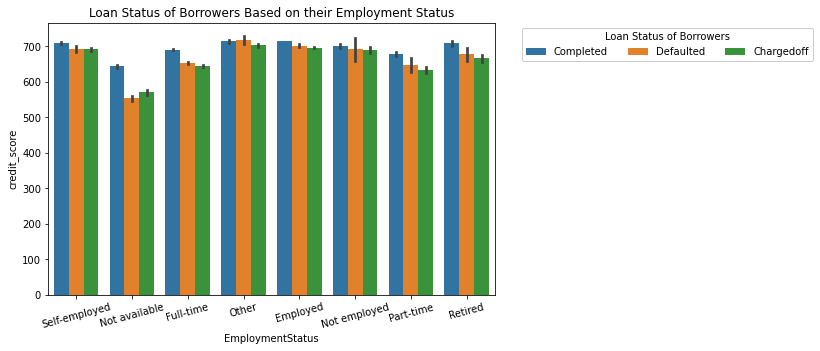

In [60]:
plt.figure(figsize=[8,5])
ax = sb.barplot(data=under_scrutiny_status, x='EmploymentStatus',y='credit_score', hue='LoanStatus')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3, framealpha=1, title='Loan Status of Borrowers')
plt.title('Loan Status of Borrowers Based on their Employment Status')
plt.xticks(rotation=15);

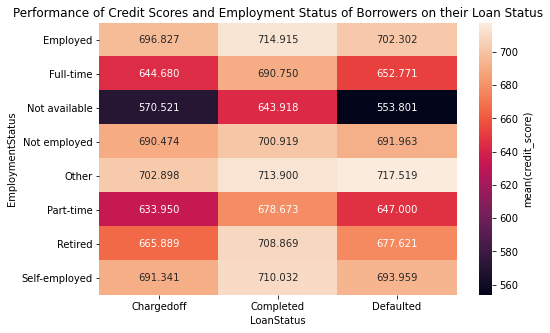

In [61]:
plt.figure(figsize=[8,5])
plt.title('Performance of Credit Scores and Employment Status of Borrowers on their Loan Status')
borrowers_mean = under_scrutiny_status.groupby(['LoanStatus','EmploymentStatus']).mean()['credit_score']
borrowers_mean = borrowers_mean.reset_index(name='Average_Credit_Score')
borrowers_mean = borrowers_mean.pivot(index='EmploymentStatus', columns='LoanStatus', values='Average_Credit_Score')
sb.heatmap(borrowers_mean, annot=True, fmt='.3f', cbar_kws={'label':'mean(credit_score)'});

Just like I suspected, every class of borrower regardless of credit score and employment status had their some loans chargedoff and defaulted as well as completed.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Relationship between Borrowers Interest Rate, Loan Status and Term')

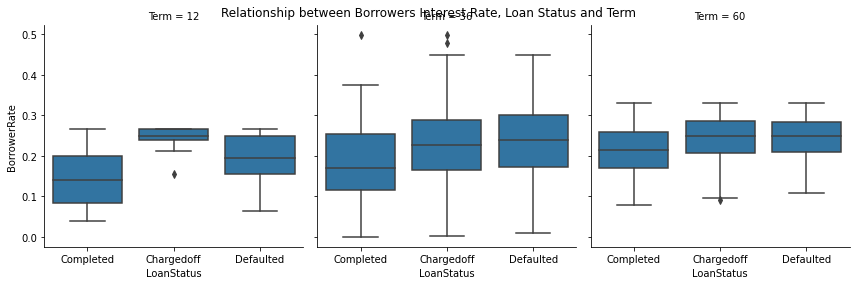

In [62]:
g=sb.FacetGrid(data=under_scrutiny_status, col='Term', height=4)
g.map(sb.boxplot, 'LoanStatus', 'BorrowerRate')
g.fig.suptitle('Relationship between Borrowers Interest Rate, Loan Status and Term')

Looking at the box plots above, borrowers who completed their term had lower interest rates compared to those who had theirs chargedoff or defaulted.

In [63]:
numeric_vars = ['OpenCreditLines', 'OpenRevolvingAccounts', 'InquiriesLast6Months', 'CurrentDelinquencies',
                'credit_score', 'StatedMonthlyIncome']
categoric_vars = ['LoanStatus', 'EmploymentStatus', 'ListingCategory']

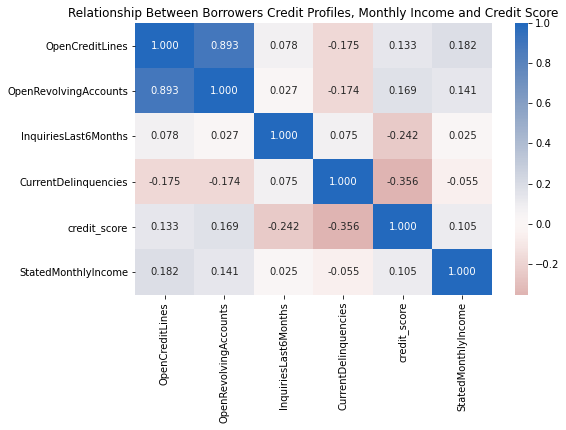

In [64]:
# correlation plot
plt.figure(figsize = [8, 5])
plt.title('Relationship Between Borrowers Credit Profiles, Monthly Income and Credit Score')
sb.heatmap(under_scrutiny_status[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

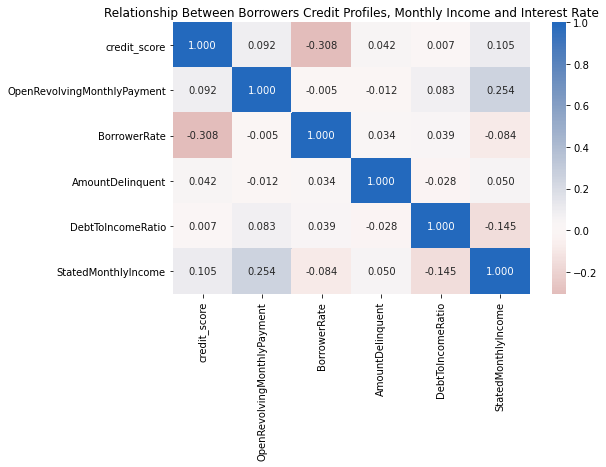

In [65]:
numeric_vars_two = ['credit_score', 'OpenRevolvingMonthlyPayment', 'BorrowerRate', 'AmountDelinquent',
                'DebtToIncomeRatio', 'StatedMonthlyIncome']
plt.figure(figsize = [8, 5])
plt.title('Relationship Between Borrowers Credit Profiles, Monthly Income and Interest Rate')
sb.heatmap(under_scrutiny_status[numeric_vars_two].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

From the above heatmaps, there appears to be no relationship between borrowers' credit profiles, credit scores and interest rates except borrowers' open credit lines which has a correlation with open revolving accounts of about 0.8. If the interest rates are not directly related to borrowers credit profiles, what then?

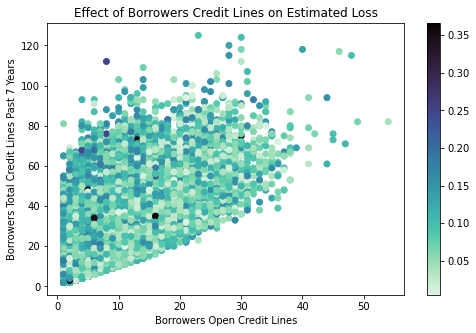

In [66]:
#exploring other factors to determine if or how credit profiles influence interest rates
plt.figure(figsize=[8,5])
plt.scatter(data=after_july_2009, x='OpenCreditLines', y='TotalCreditLinespast7years', c='EstimatedLoss', cmap='mako_r');
plt.title('Effect of Borrowers Credit Lines on Estimated Loss')
plt.xlabel('Borrowers Open Credit Lines')
plt.ylabel('Borrowers Total Credit Lines Past 7 Years')
plt.colorbar()

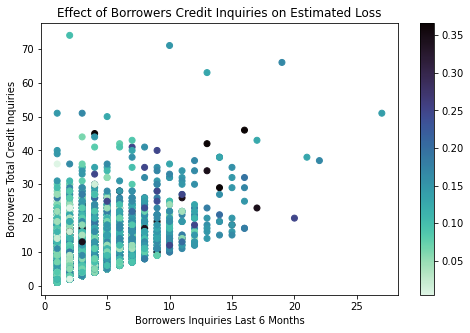

In [67]:
plt.figure(figsize=[8,5])
plt.scatter(data=after_july_2009, x='InquiriesLast6Months', y='TotalInquiries', c='EstimatedLoss', cmap='mako_r');
plt.title('Effect of Borrowers Credit Inquiries on Estimated Loss')
plt.xlabel('Borrowers Inquiries Last 6 Months')
plt.ylabel('Borrowers Total Credit Inquiries')
plt.colorbar()

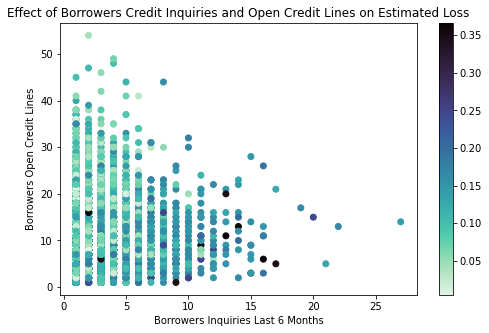

In [68]:
plt.figure(figsize=[8,5])
plt.scatter(data=prosper, x='InquiriesLast6Months', y='OpenCreditLines', c='EstimatedLoss', cmap='mako_r');
plt.title('Effect of Borrowers Credit Inquiries and Open Credit Lines on Estimated Loss')
plt.xlabel('Borrowers Inquiries Last 6 Months')
plt.ylabel('Borrowers Open Credit Lines')
plt.colorbar()

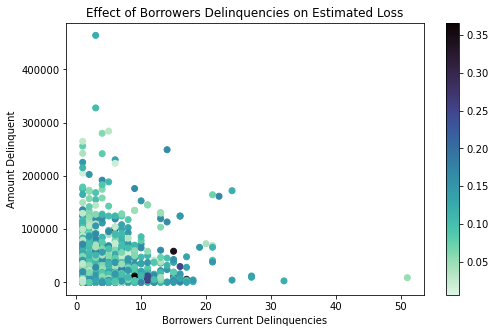

In [69]:
plt.figure(figsize=[8,5])
plt.scatter(data=prosper, x='CurrentDelinquencies', y='AmountDelinquent', c='EstimatedLoss', cmap='mako_r');
plt.title('Effect of Borrowers Delinquencies on Estimated Loss')
plt.xlabel('Borrowers Current Delinquencies')
plt.ylabel('Amount Delinquent')
plt.colorbar()

Text(0.5, 0.98, 'Effect of Estimated Loss and Rating on Borrowers Interest Rate')

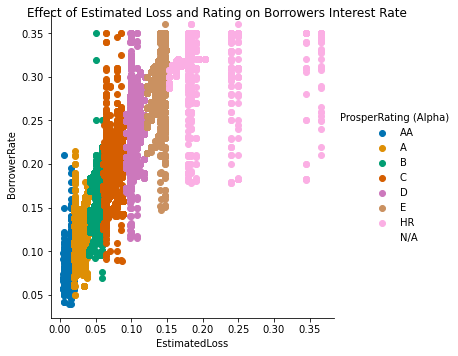

In [70]:
g=sb.FacetGrid(data=after_july_2009, hue='ProsperRating (Alpha)', height=5, palette='colorblind');
g.map(plt.scatter, 'EstimatedLoss', 'BorrowerRate')
g.add_legend()
g.fig.suptitle('Effect of Estimated Loss and Rating on Borrowers Interest Rate')

From the above scatterplots, I can see a pattern between borrowers' Estimated loss determined by prosper and their credit profiles. Credit profiles includes: borrowers' open and current credit lines, inquiries made in the last 6 months and past 7 years, current delinquencies, amount delinquent and so on which borrowers submitted as at the time their listing at prosper was created. 

These profiles influence estimated loss calculated by prosper which in turn influences interest rates. The higher the estimated loss, the higher the interest rate.

Looking at the box plots above, borrowers who completed their term had lower interest rates compared to those who had theirs chargedoff or defaulted.

In [71]:
#Incase something was missed, does homeowner borrowers have a special advantage or disadvantage?
is_borrower_homeowner = prosper.IsBorrowerHomeowner==True
is_not_homeowner = prosper.IsBorrowerHomeowner==False

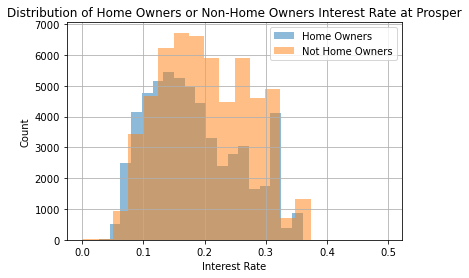

In [72]:
prosper.BorrowerRate[is_borrower_homeowner].hist(alpha=0.5, bins=20, label='Home Owners')
prosper.BorrowerRate[is_not_homeowner].hist(alpha=0.5, bins=20, label='Not Home Owners')
plt.title('Distribution of Home Owners or Non-Home Owners Interest Rate at Prosper')
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.legend();

In [73]:
#likewise, does borrowers belonging to a group at Prosper have any advantage or disadvantage?
is_borrower_ingroup = prosper.CurrentlyInGroup==True
is_not_ingroup = prosper.CurrentlyInGroup==False

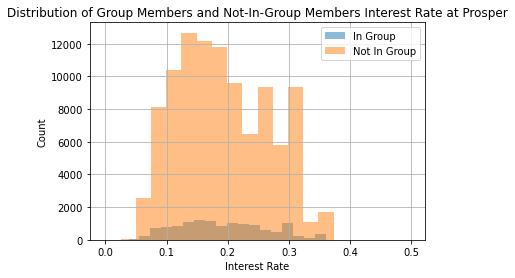

In [74]:
prosper.BorrowerRate[is_borrower_ingroup].hist(alpha=0.5, bins=20, label='In Group')
prosper.BorrowerRate[is_not_ingroup].hist(alpha=0.5, bins=20, label='Not In Group')
plt.title('Distribution of Group Members and Not-In-Group Members Interest Rate at Prosper')
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.legend();

From the histograms above, there is no interest rate advantage either being a home owner or belonging to a group at Prosper, the interest rates appears to be relatively same.

Q4. Which Loan Categories do Investors go for?

In [75]:
prosper.Investors.describe()

count    113937.000000
mean         80.475228
std         103.239020
min           1.000000
25%           2.000000
50%          44.000000
75%         115.000000
max        1189.000000
Name: Investors, dtype: float64

Text(0, 0.5, 'Number of Investors')

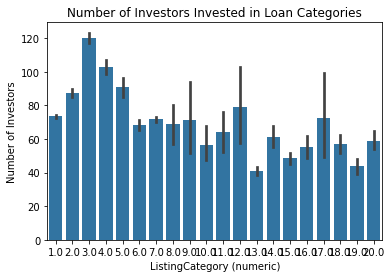

In [76]:
#what are investors interested in?
base_color = sb.color_palette()[0]
sb.barplot(data=prosper, x='ListingCategory (numeric)',y='Investors', color=base_color);
plt.title('Number of Investors Invested in Loan Categories')
plt.ylabel('Number of Investors')

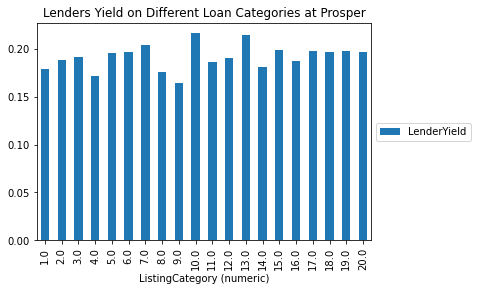

In [77]:
prosper.groupby('ListingCategory (numeric)')[['LenderYield']].mean().plot(kind='bar');
plt.title('Lenders Yield on Different Loan Categories at Prosper')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Although Investors are mainly invested in loan categories 3, 4 and 5, the yield attached to these loan categories are not the highest nor the best. Investors probably spread their investments across different loan categories to consolidate on losses, defaults and charge-offs that may result in loan repayments.

### OBSERVATIONS
1. Most borrowers at Prosper loans are mainly concerned with debt consolidation, home improvement and personal loans
2. Borrowers credit profiles and credit scores are used to determine estimated loss and returns. Based off these values, borrowers are assigned a prosper score and rating
credit profile includes: credit lines, amount delinquent, number of inquiries, revolving accounts, public records, e.t.c.
3. Borrowers monthly income, loan amount, credit score and rating greatly influence the interest rate paid on their loans
4. Interest rates are fixed at 12, 36 and 60 months
5. Borrowers are charged when they default on loan payments or their loans are charged off
6. Borrowers rating depends on their credit profile
7. Borrowers regardless of credit score or rating, from AA to HR default in loan payments though borrowers with average ratings tend to default more
8. Being a home owner or member of a group at prosper doesnt guarantee lower interest rates
9. Although loan category 3 (personal loans) had the highest number of investors, it didnt have the highest lender yield rates
10. Investors spread their investments over different loan categories to optimize yield

### CONCLUSION
1. Applicants who want to apply to Prosper for loans should ensure they have a good credit score and profile
2. Applicants that want to consolidate debt, take up personal loans or improve their homes should probably apply to prosper